In [1]:
import os
import sys
sys.path.append(os.pardir)
from dataset import ptb
from neuralflow import config
config.GPU = True
# import numpy as np
import matplotlib.pyplot as plt
from neuralflow.model import *
from neuralflow.function_class import *
from neuralflow.function import *
from neuralflow.data import *
from neuralflow.optimizer import *
from neuralflow.trainer import *
from neuralflow.gpu import *
from neuralflow.utils import *

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------



In [2]:
# 하이퍼파라미터 설정
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
lr = 0.1
max_epoch = 100

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
vocab_size = int(max(corpus) + 1)
if config.GPU:
    corpus = to_gpu(corpus)


xs = corpus[:-1]  # 입력
ts = corpus[1:]   # 출력(정답 레이블)
data_size = len(xs)
print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

# 학습 시 사용하는 변수
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

말뭉치 크기: 1000, 어휘 수: 418


In [3]:
model = Model(
    EmbeddingLayer(vocab_size, 100),
    RNNLayer(100, 100),
    DenseLayer(100, vocab_size)
)

In [4]:
print(model)

0. EmbeddingLayer1 : EmbeddingLayer (418, 100) 
1. RNNLayer1 : RNNLayer (100, 100) 
2. DenseLayer1 : DenseLayer (100, 418) 



In [5]:
critic = CrossEntropyLoss()
optim = SGDOptimizer(lr = 0.1)
# optim = Adam()

In [6]:
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
max_epoch = 100
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []


In [8]:
jump = (len(corpus) - 1) // batch_size
offsets = [i * jump for i in range(batch_size)]
dataloader = LanguageModelingDataLoader(corpus, batch_size=batch_size, time_size=time_size)
for epoch in range(max_epoch):
    for batch_x, batch_t in dataloader:
        # 기울기를 구하여 매개변수 갱신
        pred = model(batch_x)
        loss = critic(pred, batch_t)
        model.backward(critic)
        optim.update(model)
        total_loss += loss
        loss_count += 1
    # 에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count)
    print('| 에폭 %d | 퍼플렉서티 %.2f'
          % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

# 그래프 그리기
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()

TypeError: Implicit conversion to a NumPy array is not allowed. Please use `.get()` to construct a NumPy array explicitly.

In [6]:
model = Model(
    EmbeddingLayer(vocab_size, 100, initialize="Xavier"),
    RNNLayer(100, 100, initialize="Xavier"),
    DenseLayer(100, vocab_size, initialize="Xavier")
)

In [7]:
batch_size = 10
wordvec_size = 100
hidden_size = 100 # RNN의 은닉 상태 벡터의 원소 수
time_size = 5     # Truncated BPTT가 한 번에 펼치는 시간 크기
max_epoch = 100
max_iters = data_size // (batch_size * time_size)
time_idx = 0
total_loss = 0
loss_count = 0
ppl_list = []

critic = CrossEntropyLoss()
optim = SGDOptimizer(lr = 0.1)
# optim = Adam()

| 에폭 1 | 퍼플렉서티 378.33
| 에폭 2 | 퍼플렉서티 250.43
| 에폭 3 | 퍼플렉서티 221.44
| 에폭 4 | 퍼플렉서티 214.91
| 에폭 5 | 퍼플렉서티 204.64


/home/augustin/project/DL-Implement/RNN/../simpleDL/model.py:652: RuntimeWarning: overflow encountered in cast
  dx = np.empty((batch_size, n_timestep, input_dim)).astype(np.float32)


| 에폭 6 | 퍼플렉서티 200.78
| 에폭 7 | 퍼플렉서티 197.12
| 에폭 8 | 퍼플렉서티 194.51
| 에폭 9 | 퍼플렉서티 188.40
| 에폭 10 | 퍼플렉서티 188.89
| 에폭 11 | 퍼플렉서티 184.68
| 에폭 12 | 퍼플렉서티 187.65
| 에폭 13 | 퍼플렉서티 184.22
| 에폭 14 | 퍼플렉서티 184.98
| 에폭 15 | 퍼플렉서티 182.43
| 에폭 16 | 퍼플렉서티 178.10
| 에폭 17 | 퍼플렉서티 174.07
| 에폭 18 | 퍼플렉서티 170.55
| 에폭 19 | 퍼플렉서티 169.37
| 에폭 20 | 퍼플렉서티 169.19
| 에폭 21 | 퍼플렉서티 167.96
| 에폭 22 | 퍼플렉서티 160.53
| 에폭 23 | 퍼플렉서티 156.22
| 에폭 24 | 퍼플렉서티 158.22
| 에폭 25 | 퍼플렉서티 150.10
| 에폭 26 | 퍼플렉서티 149.96
| 에폭 27 | 퍼플렉서티 143.02
| 에폭 28 | 퍼플렉서티 139.82
| 에폭 29 | 퍼플렉서티 135.71
| 에폭 30 | 퍼플렉서티 129.09
| 에폭 31 | 퍼플렉서티 129.40
| 에폭 32 | 퍼플렉서티 122.76
| 에폭 33 | 퍼플렉서티 120.85
| 에폭 34 | 퍼플렉서티 112.87
| 에폭 35 | 퍼플렉서티 112.83
| 에폭 36 | 퍼플렉서티 105.62
| 에폭 37 | 퍼플렉서티 100.94
| 에폭 38 | 퍼플렉서티 97.71
| 에폭 39 | 퍼플렉서티 93.57
| 에폭 40 | 퍼플렉서티 89.47
| 에폭 41 | 퍼플렉서티 87.35
| 에폭 42 | 퍼플렉서티 82.49
| 에폭 43 | 퍼플렉서티 77.99
| 에폭 44 | 퍼플렉서티 74.46
| 에폭 45 | 퍼플렉서티 70.78
| 에폭 46 | 퍼플렉서티 69.57
| 에폭 47 | 퍼플렉서티 64.02
| 에폭 48 | 퍼플렉서티 60.67
| 에폭 49 | 퍼플렉서티 58.92
| 에폭

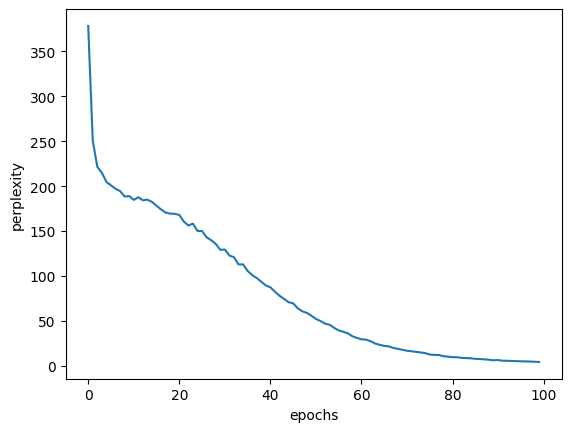

In [8]:
dataloader = LanguageModelingDataLoader(corpus, batch_size=batch_size, time_size=time_size)
for epoch in range(max_epoch):
    for batch_x, batch_t in dataloader:
        # 기울기를 구하여 매개변수 갱신
        pred = model(batch_x)
        
        loss = critic(pred, batch_t)
        model.backward(critic)
        optim.update(model)
        total_loss += loss
        loss_count += 1
    # 에폭마다 퍼플렉서티 평가
    ppl = np.exp(total_loss / loss_count)
    print('| 에폭 %d | 퍼플렉서티 %.2f'
          % (epoch+1, ppl))
    ppl_list.append(float(ppl))
    total_loss, loss_count = 0, 0

# 그래프 그리기
x = np.arange(len(ppl_list))
plt.plot(x, ppl_list, label='train')
plt.xlabel('epochs')
plt.ylabel('perplexity')
plt.show()

In [1]:
import os
import sys
sys.path.append(os.pardir)
from dataset import ptb
from neuralflow import config
config.GPU = True
# import numpy as np
import matplotlib.pyplot as plt
from neuralflow.model import *
from neuralflow.function_class import *
from neuralflow.function import *
from neuralflow.data import *
from neuralflow.optimizer import *
from neuralflow.trainer import *
from neuralflow.gpu import *
from neuralflow.utils import *


------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------



In [2]:
# 하이퍼파라미터 설정
lr = 0.1
max_epoch = 100
batch_size = 10
time_size = 5   

# 학습 데이터 읽기(전체 중 1000개만)
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus_size = 1000
corpus = corpus[:corpus_size]
if config.GPU:
    corpus = to_gpu(corpus)
vocab_size = int(max(corpus) + 1)

print('말뭉치 크기: %d, 어휘 수: %d' % (corpus_size, vocab_size))

말뭉치 크기: 1000, 어휘 수: 418


In [3]:
vocab_size = int(max(corpus) + 1)
model = Model(
    EmbeddingLayer(vocab_size, 100),
    RNNLayer(100, 100),
    DenseLayer(100, vocab_size)
)

critic = CrossEntropyLoss()
optim = SGDOptimizer(lr = 0.1)
# optim = Adam()

dataloader = LanguageModelingDataLoader(corpus, batch_size=batch_size, time_size=time_size)

In [4]:
trainer = LanguageModelTrainer(model,
                               critic=critic,
                               optimizer=optim,
                               n_epochs=max_epoch,
                               init_lr=lr)

In [5]:
trainer.train(dataloader)

epoch 1


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 6.123850953375445    train perplexity : 456.61973434958304
epoch 1 -- train loss : 6.167834275664032    train perplexity : 487.2374442954539
--------------------------------
epoch 2


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 5.497915700284966    train perplexity : 244.18245207867847
epoch 2 -- train loss : 5.624139123466281    train perplexity : 280.78796267511507
--------------------------------
epoch 3


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 5.526461376956041    train perplexity : 251.253245563629665
epoch 3 -- train loss : 5.478483750984161    train perplexity : 246.96684796008014
--------------------------------
epoch 4


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 5.453039035789418    train perplexity : 233.466602240575558
epoch 4 -- train loss : 5.385161072467757    train perplexity : 222.36251355081768
--------------------------------
epoch 5


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 5.098956581366538    train perplexity : 163.850853041648523
epoch 5 -- train loss : 5.3152941175929245    train perplexity : 209.34435259529613
--------------------------------
epoch 6


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 5.420443407237431    train perplexity : 225.979301148062268
epoch 6 -- train loss : 5.258492900451385    train perplexity : 195.88094452203973
--------------------------------
epoch 7


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 5.330501368289929    train perplexity : 206.54150156089767
epoch 7 -- train loss : 5.206699809410184    train perplexity : 186.53994905247401
--------------------------------
epoch 8


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 5.5648067898051226    train perplexity : 261.07475653188373
epoch 8 -- train loss : 5.178649013208986    train perplexity : 182.1265825861506
--------------------------------
epoch 9


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 5.092000965906346    train perplexity : 162.715123941443233
epoch 9 -- train loss : 5.114380314969899    train perplexity : 169.6517676146616
--------------------------------
epoch 10


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 5.053356240726425    train perplexity : 156.546993165826682
epoch 10 -- train loss : 5.126376585546564    train perplexity : 172.69140445600382
--------------------------------
epoch 11


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 4.784691353325078    train perplexity : 119.664423357114667
epoch 11 -- train loss : 5.048057027466609    train perplexity : 159.71839416025446
--------------------------------
epoch 12


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 4.99309915991233    train perplexity : 147.3925093454942316
epoch 12 -- train loss : 5.037470999485838    train perplexity : 158.92144173492878
--------------------------------
epoch 13


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 4.590287724879055    train perplexity : 98.5227735373038228
epoch 13 -- train loss : 5.006323592457929    train perplexity : 152.04640711262337
--------------------------------
epoch 14


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 4.764817541988722    train perplexity : 117.30971123839934
epoch 14 -- train loss : 4.967277287163084    train perplexity : 147.1349960733736
--------------------------------
epoch 15


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 4.895762265587329    train perplexity : 133.721899377107343
epoch 15 -- train loss : 4.903358354112666    train perplexity : 138.04461449746788
--------------------------------
epoch 16


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 5.016554847314498    train perplexity : 150.890566259385372
epoch 16 -- train loss : 4.838178822822444    train perplexity : 128.35705903350265
--------------------------------
epoch 17


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 5.04239263392423    train perplexity : 154.8400477239843369
epoch 17 -- train loss : 4.8073871021329175    train perplexity : 124.30908986858849
--------------------------------
epoch 18


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 4.72926578854626    train perplexity : 113.212409978572238
epoch 18 -- train loss : 4.732205410326188    train perplexity : 115.51070199264716
--------------------------------
epoch 19


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 4.579602937796591    train perplexity : 97.4756826127901196
epoch 19 -- train loss : 4.67791028516678    train perplexity : 109.56744654525956
--------------------------------
epoch 20


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 4.481888701064355    train perplexity : 88.4014790699683537
epoch 20 -- train loss : 4.662334827734519    train perplexity : 107.81609566334778
--------------------------------
epoch 21


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 4.925201915592726    train perplexity : 137.717146074868142
epoch 21 -- train loss : 4.595449617055581    train perplexity : 100.19313716505623
--------------------------------
epoch 22


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 4.957578422825538    train perplexity : 142.24891176592925
epoch 22 -- train loss : 4.568171907410039    train perplexity : 99.20061144606507
--------------------------------
epoch 23


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 4.57279569121333    train perplexity : 96.81439493311602344
epoch 23 -- train loss : 4.500257668368859    train perplexity : 92.47402919275874
--------------------------------
epoch 24


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 4.446462954495835    train perplexity : 85.3246126000434266
epoch 24 -- train loss : 4.386060024353184    train perplexity : 82.5184848377229
--------------------------------
epoch 25


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 4.117615497086492    train perplexity : 61.4126289413121852
epoch 25 -- train loss : 4.342348082314263    train perplexity : 78.89522953807958
--------------------------------
epoch 26


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 4.600303552736789    train perplexity : 99.5145189621328386
epoch 26 -- train loss : 4.3270186123952765    train perplexity : 78.50553123401463
--------------------------------
epoch 27


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 4.21213214132581    train perplexity : 67.50030668339125964
epoch 27 -- train loss : 4.251086608486622    train perplexity : 72.03195715491142
--------------------------------
epoch 28


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 4.38828569312462    train perplexity : 80.5022949830715566
epoch 28 -- train loss : 4.143527380452011    train perplexity : 64.40254008227542
--------------------------------
epoch 29


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 4.409161689957433    train perplexity : 82.2005250866706235
epoch 29 -- train loss : 4.145185472138282    train perplexity : 64.27140238807561
--------------------------------
epoch 30


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 3.8183307958532033    train perplexity : 45.528149084064875
epoch 30 -- train loss : 3.9957153971826815    train perplexity : 55.73450648828549
--------------------------------
epoch 31


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 3.8798902628506613    train perplexity : 48.418901427581674
epoch 31 -- train loss : 3.9545638127270712    train perplexity : 53.46077463817588
--------------------------------
epoch 32


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 3.49537846844248    train perplexity : 32.96276095733582454
epoch 32 -- train loss : 3.8948768440642696    train perplexity : 50.43315359187568
--------------------------------
epoch 33


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 3.3810524784082334    train perplexity : 29.401699488587965
epoch 33 -- train loss : 3.861827112940702    train perplexity : 49.609282754763775
--------------------------------
epoch 34


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 3.4441070712137787    train perplexity : 31.315308618248697
epoch 34 -- train loss : 3.7631730621986406    train perplexity : 44.00971951139797
--------------------------------
epoch 35


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 3.8340136439417596    train perplexity : 46.247788377109142
epoch 35 -- train loss : 3.722821524916502    train perplexity : 43.03417847312176
--------------------------------
epoch 36


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 3.6905581997878563    train perplexity : 40.067206222250924
epoch 36 -- train loss : 3.6795055712062186    train perplexity : 41.222448325089374
--------------------------------
epoch 37


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 3.59998247450867    train perplexity : 36.59759304725796103
epoch 37 -- train loss : 3.5939840926928723    train perplexity : 37.229223510384976
--------------------------------
epoch 38


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 3.876410205107676    train perplexity : 48.2506937108062966
epoch 38 -- train loss : 3.5311392687883782    train perplexity : 35.017708965204925
--------------------------------
epoch 39


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 3.549686290535787    train perplexity : 34.8023979332988276
epoch 39 -- train loss : 3.444716641515706    train perplexity : 31.85891289457916
--------------------------------
epoch 40


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 3.0573821189554895    train perplexity : 21.271797172761183
epoch 40 -- train loss : 3.3566399897939605    train perplexity : 29.16355921319026
--------------------------------
epoch 41


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 3.398575530331027    train perplexity : 29.9214474815768398
epoch 41 -- train loss : 3.3092630420026814    train perplexity : 27.980279309001492
--------------------------------
epoch 42


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 3.58847427596251    train perplexity : 36.17883487787306477
epoch 42 -- train loss : 3.2206070814010714    train perplexity : 25.599533628029864
--------------------------------
epoch 43


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 3.429488103762949    train perplexity : 30.8608411571736356
epoch 43 -- train loss : 3.2039568974936956    train perplexity : 25.406319873557106
--------------------------------
epoch 44


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 3.1335503296917318    train perplexity : 22.955334043373483
epoch 44 -- train loss : 3.112806151785537    train perplexity : 23.0232238808802
--------------------------------
epoch 45


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 2.543800456085027    train perplexity : 12.7279511888441572
epoch 45 -- train loss : 3.0832287531297773    train perplexity : 22.611982117833637
--------------------------------
epoch 46


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 2.894527070504356    train perplexity : 18.0749512420217398
epoch 46 -- train loss : 3.0095039680375293    train perplexity : 21.10991191634475
--------------------------------
epoch 47


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 3.1223677308454096    train perplexity : 22.700063704417186
epoch 47 -- train loss : 2.899678709174497    train perplexity : 18.58317054277966
--------------------------------
epoch 48


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 2.817344912863748    train perplexity : 16.7323657535340156
epoch 48 -- train loss : 2.852936479506621    train perplexity : 17.568752528400797
--------------------------------
epoch 49


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 2.974016307078445    train perplexity : 19.5703625507291431
epoch 49 -- train loss : 2.758439758105466    train perplexity : 15.979609134778547
--------------------------------
epoch 50


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 2.6877504987014915    train perplexity : 14.698574241423877
epoch 50 -- train loss : 2.730895420994602    train perplexity : 15.618030464929893
--------------------------------
epoch 51


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 2.468298856283735    train perplexity : 11.8023522672077977
epoch 51 -- train loss : 2.6279799599872042    train perplexity : 14.129718208466182
--------------------------------
epoch 52


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 2.1955466331040197    train perplexity : 8.9849111645626133
epoch 52 -- train loss : 2.6049936284035873    train perplexity : 13.821989650868256
--------------------------------
epoch 53


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 2.4817353646842264    train perplexity : 11.962004857312973
epoch 53 -- train loss : 2.5273596775911895    train perplexity : 12.654303667030899
--------------------------------
epoch 54


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 2.1863808599345798    train perplexity : 8.9029337738834521
epoch 54 -- train loss : 2.4407164735816624    train perplexity : 11.827135785441886
--------------------------------
epoch 55


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 2.5115249661529075    train perplexity : 12.323708977333624
epoch 55 -- train loss : 2.3841414879270784    train perplexity : 11.191745980048063
--------------------------------
epoch 56


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 2.4229598947775663    train perplexity : 11.279195186134928
epoch 56 -- train loss : 2.323149630187801    train perplexity : 10.40166225124491
--------------------------------
epoch 57


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 2.0134235500507054    train perplexity : 7.4889121753904173
epoch 57 -- train loss : 2.2459106794538872    train perplexity : 9.623114450539083
--------------------------------
epoch 58


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 2.1137642863629167    train perplexity : 8.2793485383858955
epoch 58 -- train loss : 2.1786826732158473    train perplexity : 8.930680909153564
--------------------------------
epoch 59


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 2.384857297302895    train perplexity : 10.8575131579522435
epoch 59 -- train loss : 2.1282721734383743    train perplexity : 8.498503640397761
--------------------------------
epoch 60


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.9462630305696775    train perplexity : 7.0024706064905923
epoch 60 -- train loss : 2.0779992345597207    train perplexity : 8.110322921598467
--------------------------------
epoch 61


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.9495382868951874    train perplexity : 7.0254430924926765
epoch 61 -- train loss : 1.9937708778974355    train perplexity : 7.4466828570290975
--------------------------------
epoch 62


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 2.01983886071321    train perplexity : 7.53711031122284628
epoch 62 -- train loss : 1.9458213097147712    train perplexity : 7.072103657749715
--------------------------------
epoch 63


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.8220146890276783    train perplexity : 6.1843053594988955
epoch 63 -- train loss : 1.8647135387162608    train perplexity : 6.49282168135985
--------------------------------
epoch 64


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.719357447194855    train perplexity : 5.5809412624526418
epoch 64 -- train loss : 1.859016574320456    train perplexity : 6.549016781379637
--------------------------------
epoch 65


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.6278749085840227    train perplexity : 5.0930400346085165
epoch 65 -- train loss : 1.8446004146567925    train perplexity : 6.452497689749793
--------------------------------
epoch 66


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.475097492008004    train perplexity : 4.3714619347576679
epoch 66 -- train loss : 1.7848714938026127    train perplexity : 6.050617991548589
--------------------------------
epoch 67


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.7364289521952574    train perplexity : 5.6770342210969986
epoch 67 -- train loss : 1.6825197119217576    train perplexity : 5.449136044449172
--------------------------------
epoch 68


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.7439493459667816    train perplexity : 5.7198886931724162
epoch 68 -- train loss : 1.6240862344340379    train perplexity : 5.129402215556458
--------------------------------
epoch 69


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.6445567627368747    train perplexity : 5.1787139991506566
epoch 69 -- train loss : 1.5965952690200969    train perplexity : 4.986769058129632
--------------------------------
epoch 70


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.4659940111442487    train perplexity : 4.3318470051495975
epoch 70 -- train loss : 1.5289877122960949    train perplexity : 4.655597767565118
--------------------------------
epoch 71


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.552313825339823    train perplexity : 4.72238432352563676
epoch 71 -- train loss : 1.4880384542872567    train perplexity : 4.4792709912387005
--------------------------------
epoch 72


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.43325557617887    train perplexity : 4.19232543407068413
epoch 72 -- train loss : 1.403548855405427    train perplexity : 4.099975220248727
--------------------------------
epoch 73


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.1477384293029704    train perplexity : 3.1510585036723047
epoch 73 -- train loss : 1.3734489547599125    train perplexity : 3.9819821196253944
--------------------------------
epoch 74


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.0496125926991724    train perplexity : 2.8565442575735687
epoch 74 -- train loss : 1.3023207351760546    train perplexity : 3.7222708290949535
--------------------------------
epoch 75


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.1517488076558846    train perplexity : 3.1637208138406985
epoch 75 -- train loss : 1.319885156338897    train perplexity : 3.7930453168466194
--------------------------------
epoch 76


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.470840636225401    train perplexity : 4.35289280284120467
epoch 76 -- train loss : 1.2677210495492308    train perplexity : 3.589114564533682
--------------------------------
epoch 77


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.3410371319821632    train perplexity : 3.8230064122005114
epoch 77 -- train loss : 1.223235597881666    train perplexity : 3.425755420786849
--------------------------------
epoch 78


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.265203826680058    train perplexity : 3.54381498654297443
epoch 78 -- train loss : 1.1573327614503834    train perplexity : 3.2070678833774067
--------------------------------
epoch 79


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.2449947621457724    train perplexity : 3.4729166086582455
epoch 79 -- train loss : 1.1150483917079534    train perplexity : 3.064811584317009
--------------------------------
epoch 80


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 0.9717436131914338    train perplexity : 2.6425480263655277
epoch 80 -- train loss : 1.0953739599915047    train perplexity : 3.0055687954782337
--------------------------------
epoch 81


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.0472146407054215    train perplexity : 2.8497026078280956
epoch 81 -- train loss : 1.0848920649090636    train perplexity : 2.977315644921025
--------------------------------
epoch 82


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.1939427204224513    train perplexity : 3.3000668321117934
epoch 82 -- train loss : 1.030971391972167    train perplexity : 2.817185094564694
--------------------------------
epoch 83


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.0544418574913619    train perplexity : 2.8703726297442377
epoch 83 -- train loss : 0.9305643001900271    train perplexity : 2.543258757728373
--------------------------------
epoch 84


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 0.8528068698911162    train perplexity : 2.3462231613353137
epoch 84 -- train loss : 0.9067888150440365    train perplexity : 2.4856168068020454
--------------------------------
epoch 85


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 1.0328345273694222    train perplexity : 2.8090167957559222
epoch 85 -- train loss : 0.8907781697943247    train perplexity : 2.452396186050491
--------------------------------
epoch 86


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 0.6896442687332835    train perplexity : 1.9930064324231138
epoch 86 -- train loss : 0.9013126820617613    train perplexity : 2.47515939530783
--------------------------------
epoch 87


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 0.8797906523997705    train perplexity : 2.4103950431761494
epoch 87 -- train loss : 0.8532594115278554    train perplexity : 2.354698170883408
--------------------------------
epoch 88


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 0.9461269074907405    train perplexity : 2.5757143355049766
epoch 88 -- train loss : 0.8309293484210609    train perplexity : 2.3021915547015874
--------------------------------
epoch 89


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 0.8700085240621885    train perplexity : 2.3869311997875466
epoch 89 -- train loss : 0.8227764352691911    train perplexity : 2.286810132257358
--------------------------------
epoch 90


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 0.7192010149341235    train perplexity : 2.0527924047667267
epoch 90 -- train loss : 0.7638980250573101    train perplexity : 2.1528968716915693
--------------------------------
epoch 91


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 0.6835291545780785    train perplexity : 1.9808561585954088
epoch 91 -- train loss : 0.7417766199865623    train perplexity : 2.104337156533913
--------------------------------
epoch 92


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 0.7320581691795516    train perplexity : 2.0793558727261154
epoch 92 -- train loss : 0.6991071513442749    train perplexity : 2.02410244063382
--------------------------------
epoch 93


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 0.7484946967937176    train perplexity : 2.1138156869920534
epoch 93 -- train loss : 0.6706624524519674    train perplexity : 1.9611971642233745
--------------------------------
epoch 94


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 0.6172126075603301    train perplexity : 1.8537536946948725
epoch 94 -- train loss : 0.6603194928929289    train perplexity : 1.9394881031912836
--------------------------------
epoch 95


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 0.5701783552817529    train perplexity : 1.7685824593284039
epoch 95 -- train loss : 0.6773188522900854    train perplexity : 1.9767296586412673
--------------------------------
epoch 96


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 0.5750199047483079    train perplexity : 1.7771659006019378
epoch 96 -- train loss : 0.6242288426854469    train perplexity : 1.8705234585548223
--------------------------------
epoch 97


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 0.6088653162528428    train perplexity : 1.8383442755220347
epoch 97 -- train loss : 0.5890387741281335    train perplexity : 1.806737772270616
--------------------------------
epoch 98


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 0.6220895119470005    train perplexity : 1.8628163551221986
epoch 98 -- train loss : 0.5890419313551272    train perplexity : 1.8041811586830319
--------------------------------
epoch 99


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 0.6405315446924346    train perplexity : 1.89748921161375184
epoch 99 -- train loss : 0.5424945302329359    train perplexity : 1.723326451213522
--------------------------------
epoch 100


  0%|          | 0/20 [00:00<?, ?it/s]

train loss : 0.5099852130890631    train perplexity : 1.66526657061536215
epoch 100 -- train loss : 0.5268592277930215    train perplexity : 1.696617739430375
--------------------------------


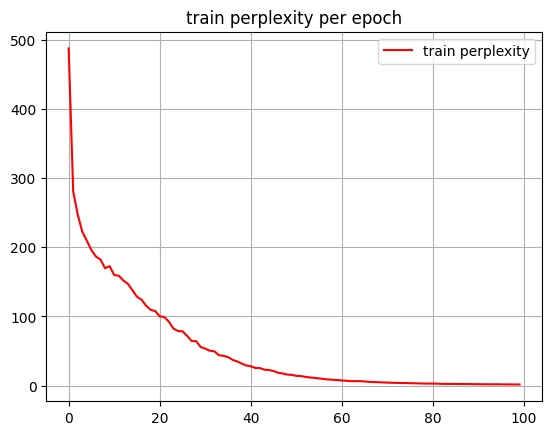

In [6]:
trainer.show_perplexity_graph()

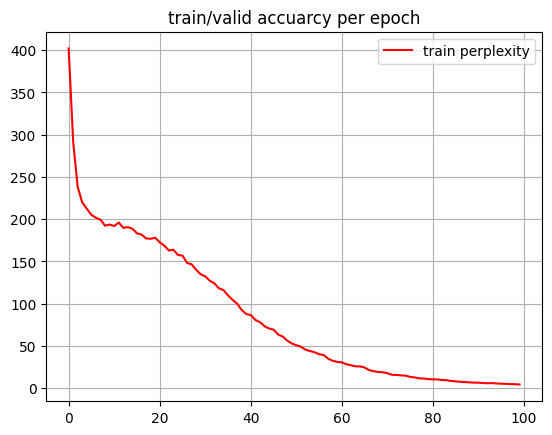

In [ ]:
trainer.show_perplexity_graph()